In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
cab_df = pd.read_csv('D:\PROJECT PORTFOLIO\Taxi investment decision\data\Cab_Data.csv')
trans_df = pd.read_csv('D:\PROJECT PORTFOLIO\Taxi investment decision\data\Transaction_ID.csv')
cus_df = pd.read_csv('D:\PROJECT PORTFOLIO\Taxi investment decision\data\Customer_ID.csv')
city_df = pd.read_csv('D:\PROJECT PORTFOLIO\Taxi investment decision\data\City.csv')
holiday_df = pd.read_csv('D:\\PROJECT PORTFOLIO\\Taxi investment decision\\data\\US_holidays.csv')

## Data processing

### Cab_Data

In [4]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


##### Convert 'Date of Travel' into suitable field and create more fields from the Date such as 'Year', 'Day of Week' for further analysis

In [5]:
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])
cab_df['Month'] = pd.to_datetime(cab_df['Date of Travel']).dt.month
cab_df['Year'] = pd.to_datetime(cab_df['Date of Travel']).dt.year
cab_df['Day of Week'] = cab_df['Date of Travel'].map(lambda x: x.isoweekday())
cab_df['Month-Year'] = pd.to_datetime(cab_df['Date of Travel'].dt.strftime('%Y-%m'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\1832302369.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])


In [6]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Month           359392 non-null  int64         
 8   Year            359392 non-null  int64         
 9   Day of Week     359392 non-null  int64         
 10  Month-Year      359392 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 30.2+ MB


In [7]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Day of Week,Month-Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016,1,2016-08-01
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016,3,2016-06-01
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016,1,2016-02-01
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016,5,2016-07-01
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016,2,2016-03-01


### Transaction_ID

In [8]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### Customer_ID

In [11]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### City

In [12]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


##### Values of 'Population' and 'Users' are in the wron format which have comma in each values. Remove those comma then convert into int type for further analysis

In [14]:
city_df['Population'] = city_df['Population'].map(lambda x: x.replace(',', ''))
city_df['Users'] = city_df['Users'].map(lambda x: x.replace(',', ''))

In [15]:
city_df['Population'] = city_df['Population'].astype(int)
city_df['Users'] = city_df['Users'].astype(int)

In [16]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [17]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


### Data Analysis

In [20]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Day of Week,Month-Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016,1,2016-08-01
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016,3,2016-06-01
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016,1,2016-02-01
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016,5,2016-07-01
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016,2,2016-03-01


##### Create 'Profit' field for further complex analysis

In [21]:
cab_df['Profit'] = cab_df['Price Charged'] - cab_df['Cost of Trip']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\445260214.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


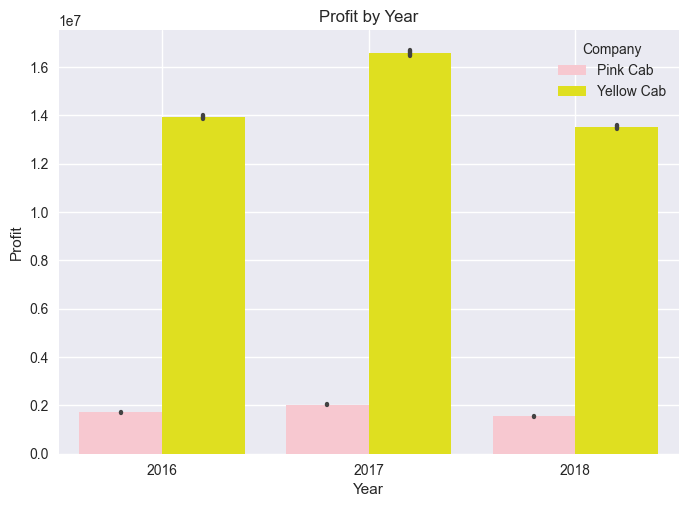

In [46]:
plt.style.use('seaborn')
sns.barplot(data=cab_df, x=cab_df['Year'], y=cab_df['Profit'], hue=cab_df['Company'], palette=['pink', 'yellow'], estimator=sum)
plt.title('Profit by Year')
plt.grid(True)
plt.show()

1. In general, Profit of Yellow cab is much higher than Pink Cab's profit from 2016-2018. 
2. Both companies' profit increased from 2016 to 2017. However, there were a large drop of profit in 2018 comparing to profit in 2017 for both companies.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3396035301.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


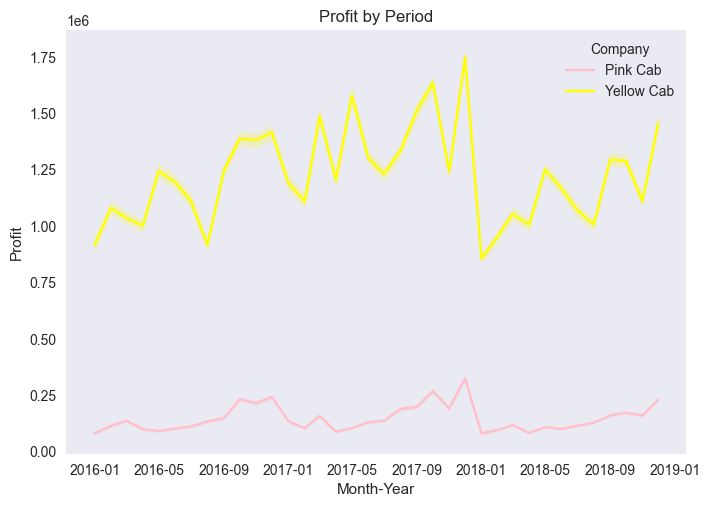

In [38]:
plt.style.use('seaborn')
sns.lineplot(data = cab_df, x=cab_df['Month-Year'], y = cab_df['Profit'], hue=cab_df['Company'], palette=['pink', 'yellow'], estimator=sum)
plt.title('Profit by Period')
plt.grid(False)
plt.show()

1. There were a pattern that in the beginning of year, the number of transaction is very low. However, in the end of year, the profit of transaction reachs the highest value during the year
2. In general, Pink Cab has generated a more stable profit than Yellow Cab. Because the line chart of Pink Cab did not fluctuate as much as that of Yellow Cab.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2845226732.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


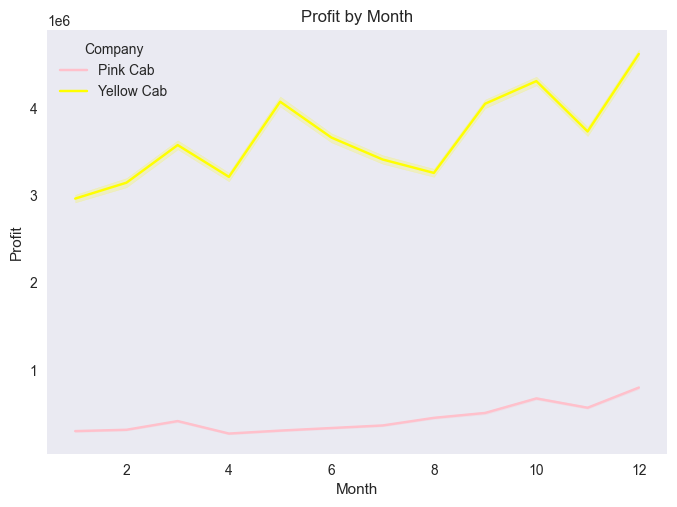

In [42]:
plt.style.use('seaborn')
sns.lineplot(data = cab_df, x=cab_df['Month'], y = cab_df['Profit'], hue=cab_df['Company'], palette=['pink', 'yellow'], estimator=sum)
plt.title('Profit by Month')
plt.grid(False)
plt.show()

The first month of year generate the least profit because this month is New Year day. Many Americans like to rest, stay at home, and relax. Meanwhile, the end of year is the busiest period of American because there are some of big holidays such as Christmas and winter break seasons

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3788266932.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


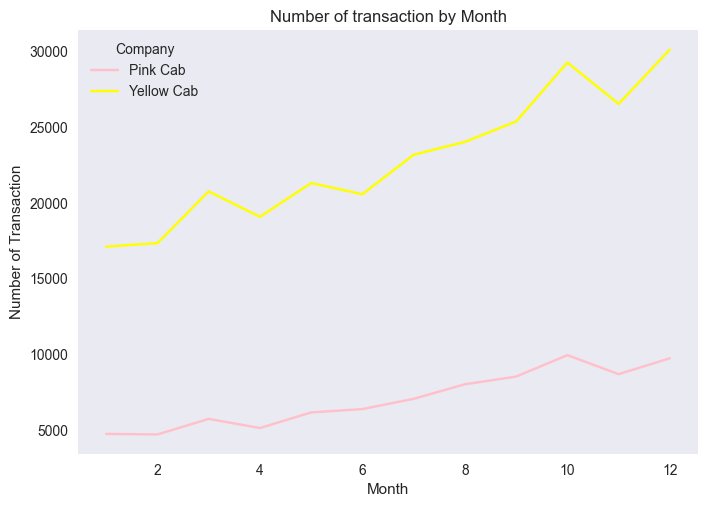

In [61]:
plt.style.use('seaborn')
sns.lineplot(data = cab_df.groupby(['Company', 'Month'])['Transaction ID'].count().reset_index(), x='Month', y = 'Transaction ID', hue='Company', palette=['pink', 'yellow'])
plt.title('Number of transaction by Month')
plt.ylabel('Number of Transaction')
plt.grid(False)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\418995840.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


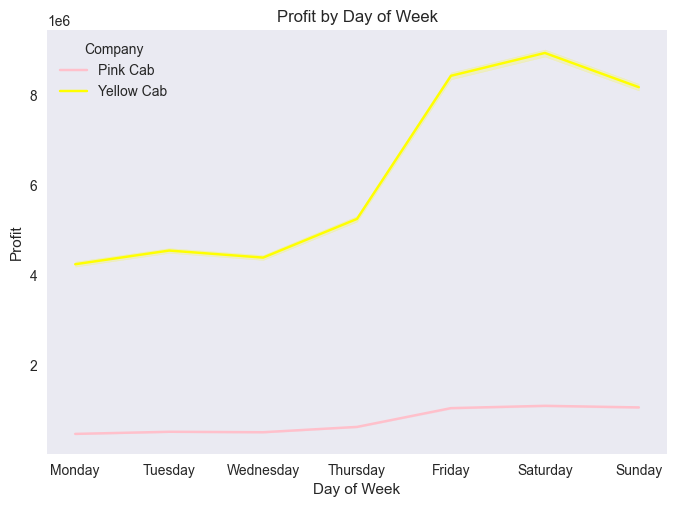

In [41]:
plt.style.use('seaborn')
sns.lineplot(data = cab_df, x='Day of Week', y = 'Profit', hue='Company', palette=['pink', 'yellow'], estimator=sum)
plt.xticks(ticks=[1,2,3,4,5,6,7] ,labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Profit by Day of Week')
plt.grid(False)
plt.show()

On weekdays, the number of transaction is rather low. The reason may be people were still working. They have no time for hanging out. However, the number of transaction reach the highest on Saturday because of there were lots of hanging out actions on that day (it's weekend)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3525939779.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


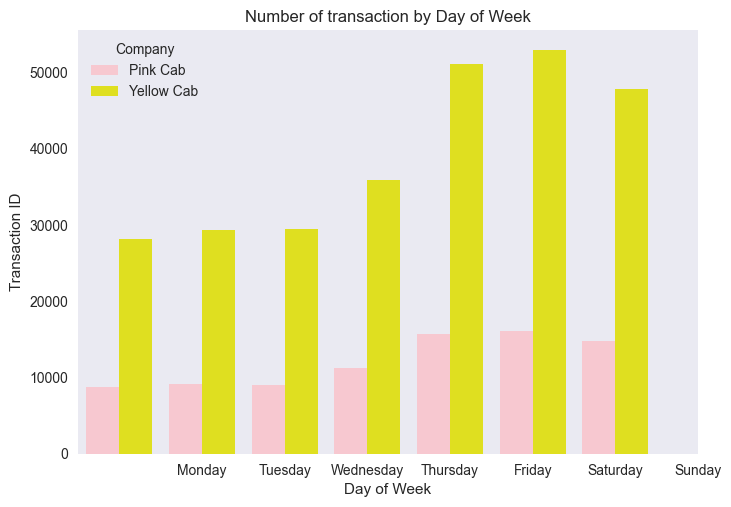

In [71]:
plt.style.use('seaborn')
sns.barplot(data = cab_df.groupby(['Company', 'Day of Week'])['Transaction ID'].count().reset_index(), x='Day of Week', y = 'Transaction ID', hue='Company', palette=['pink', 'yellow'])
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7] ,labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of transaction by Day of Week')
plt.grid(False)
plt.show()

#### Conclusion
1. Yellow Cab always generates profit much higher than Pink Cab.
2. Profit of Yellow Cab is fluactuated more than profit of Pink Cab.
3. Number of transaction as well as Proft increase at the weekend, especially on Saturday.
4. Profit of both companies is low at the beginning of year but is highest at the end of year.

In [74]:
master_df = cab_df.merge(trans_df, how='inner', on='Transaction ID')
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Day of Week,Month-Year,Profit,Customer ID,Payment_Mode
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016,1,2016-08-01,57.315,29290,Card
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016,3,2016-06-01,23.666,27703,Card
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016,1,2016-02-01,27.568,28712,Cash
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016,5,2016-07-01,25.798,28020,Cash
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016,2,2016-03-01,16.844,27182,Card


In [141]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Month           359392 non-null  int64         
 8   Year            359392 non-null  int64         
 9   Day of Week     359392 non-null  int64         
 10  Month-Year      359392 non-null  datetime64[ns]
 11  Profit          359392 non-null  float64       
 12  Customer ID     359392 non-null  int64         
 13  Payment_Mode    359392 non-null  object        
dtypes: datetime64[ns](2), float64(4), in

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2046872985.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


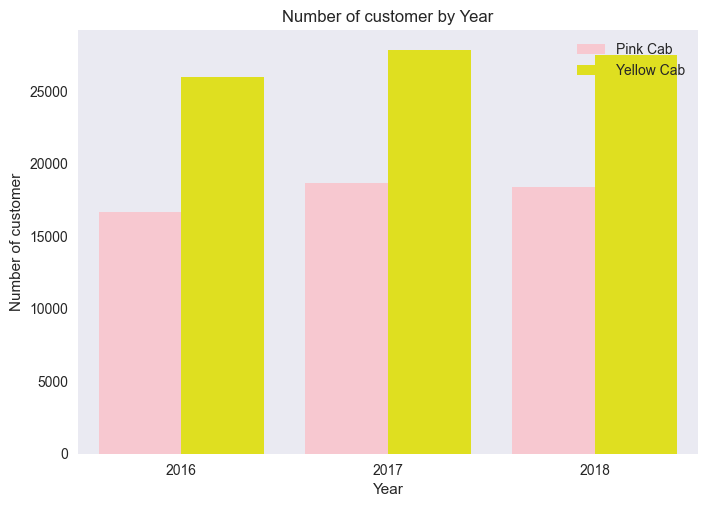

In [254]:
plt.style.use('seaborn')
sns.barplot(data = master_df.groupby(['Company', 'Year'])['Customer ID'].nunique().reset_index(), x='Year', y = 'Customer ID', hue='Company', palette=['pink', 'yellow'])
plt.title('Number of customer by Year')
plt.ylabel('Number of customer')
plt.grid(False)
plt.legend()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\1825872572.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


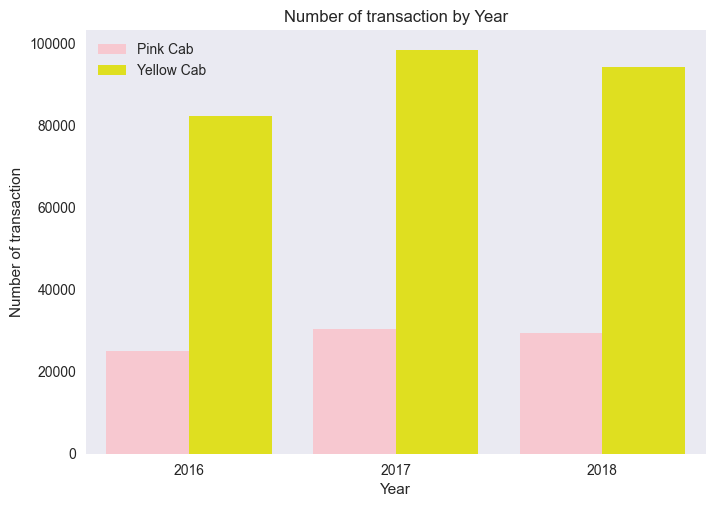

In [256]:
plt.style.use('seaborn')
sns.barplot(data = master_df.groupby(['Company', 'Year'])['Transaction ID'].nunique().reset_index(), x='Year', y = 'Transaction ID', hue='Company', palette=['pink', 'yellow'])
plt.title('Number of transaction by Year')
plt.ylabel('Number of transaction')
plt.grid(False)
plt.legend()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\1665360507.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


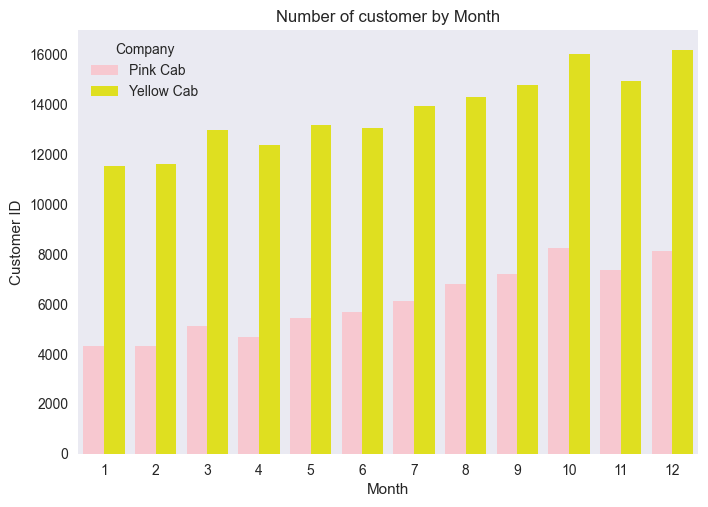

In [77]:
plt.style.use('seaborn')
sns.barplot(data = master_df.groupby(['Company', 'Month'])['Customer ID'].nunique().reset_index(), x='Month', y = 'Customer ID', hue='Company', palette=['pink', 'yellow'])
plt.title('Number of customer by Month')
plt.grid(False)
plt.show()

In [198]:
unique_cus_by_month = master_df.groupby(['Company', 'Month-Year'])['Customer ID'].nunique().reset_index()
filter_cus = master_df.groupby(['Company', 'Month-Year', 'Customer ID'])['Transaction ID'].count().reset_index()
filter_cus = filter_cus.loc[filter_cus['Transaction ID']> 1].groupby(['Company', 'Month-Year'])['Customer ID'].count().reset_index()
total_cus = unique_cus_by_month.merge(filter_cus, how='inner', on=['Company', 'Month-Year'])

In [199]:
total_cus.head()

,Company,Month-Year,Customer ID_x,Customer ID_y
0,Pink Cab,2016-01-01,1261,29
1,Pink Cab,2016-02-01,1428,37
2,Pink Cab,2016-03-01,1591,67
3,Pink Cab,2016-04-01,1500,47
4,Pink Cab,2016-05-01,1717,73


In [200]:
total_cus['Repeat Rate'] = round((total_cus['Customer ID_y'] / total_cus['Customer ID_x'])*100, 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2656755307.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


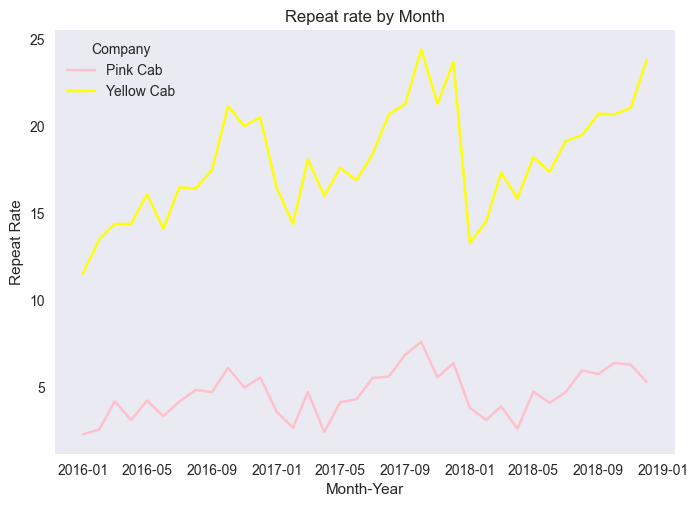

In [202]:
plt.style.use('seaborn')
sns.lineplot(data = total_cus, x='Month-Year', y = 'Repeat Rate', hue='Company', palette=['pink', 'yellow'])
plt.title('Repeat rate by Month')
plt.grid(False)
plt.show()

In [205]:
unique_cus_by_year = master_df.groupby(['Company', 'Year'])['Customer ID'].nunique().reset_index()
filter_cus_by_year = master_df.groupby(['Company', 'Year', 'Customer ID'])['Transaction ID'].count().reset_index()
filter_cus_by_year = filter_cus_by_year.loc[filter_cus_by_year['Transaction ID']> 1].groupby(['Company', 'Year'])['Customer ID'].count().reset_index()
total_cus_by_year = unique_cus_by_year.merge(filter_cus_by_year, how='inner', on=['Company', 'Year'])

In [206]:
total_cus_by_year.head(10)

,Company,Year,Customer ID_x,Customer ID_y
0,Pink Cab,2016,16661,5469
1,Pink Cab,2017,18643,7033
2,Pink Cab,2018,18400,6678
3,Yellow Cab,2016,25937,15518
4,Yellow Cab,2017,27789,16971
5,Yellow Cab,2018,27470,16682


In [207]:
total_cus_by_year['Repeat Rate'] = round((total_cus_by_year['Customer ID_y'] / total_cus_by_year['Customer ID_x']) *100, 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\218196518.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


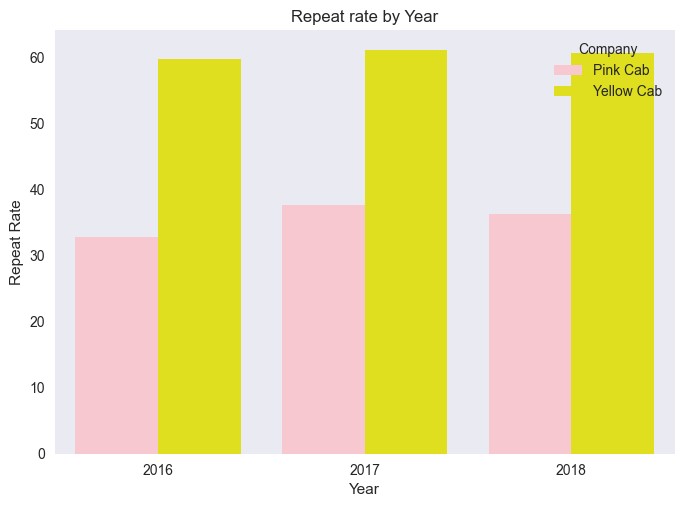

In [208]:
plt.style.use('seaborn')
sns.barplot(data = total_cus_by_year, x='Year', y = 'Repeat Rate', hue='Company', palette=['pink', 'yellow'])
plt.title('Repeat rate by Year')
plt.grid(False)
plt.show()

#### Average price for 1km

In [136]:
np.sum(master_df.loc[master_df['Company'] == 'Yellow Cab']['Price Charged'] * master_df.loc[master_df['Company'] == 'Yellow Cab']['KM Travelled']) / np.sum(master_df.loc[master_df['Company'] == 'Yellow Cab']['Price Charged'])

29.18962622370235

In [137]:
np.sum(master_df.loc[master_df['Company'] == 'Pink Cab']['Price Charged'] * master_df.loc[master_df['Company'] == 'Pink Cab']['KM Travelled']) / np.sum(master_df.loc[master_df['Company'] == 'Pink Cab']['Price Charged'])

29.204642363040673

### Conclusion
1. Lots of customers prefer Yellow Cab to Pink Cab -> One of the reason is because the average cost for each Km of Yellow Cab is a little bit lower than Pink Cab
2. Customer of Yellow cab is more loyal than those of Pink cab -> the profit and revenue of Yellow Cab will be sustainable

In [139]:
master_df.merge(cus_df, how='inner', on=['Customer ID'])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Day of Week,Month-Year,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,1,2016-08-01,57.3150,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,6,2018-07-01,281.2772,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,5,2018-11-01,194.6480,29290,Card,Male,28,10813
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,3,2016-06-01,23.6660,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,6,2018-04-01,253.9808,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-07-01,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,7,2018,7,2018-07-01,47.2656,38520,Card,Female,42,19417
359388,10439799,2018-03-01,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,3,2018,4,2018-03-01,105.0980,12490,Cash,Male,33,18713
359389,10439838,2018-04-01,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,4,2018,7,2018-04-01,71.2100,41414,Card,Male,38,3960
359390,10439840,2018-06-01,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,6,2018,5,2018-06-01,21.8600,41677,Cash,Male,23,19454


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\1890229627.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


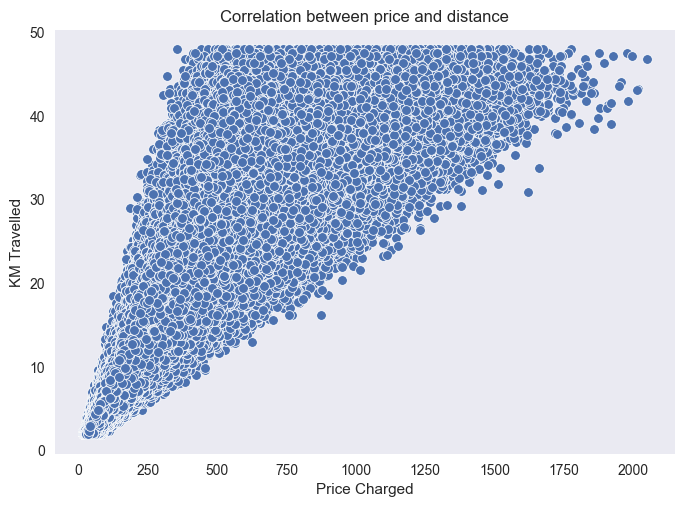

In [145]:
plt.style.use('seaborn')
sns.scatterplot(data=master_df, x='Price Charged', y='KM Travelled')
plt.title('Correlation between price and distance')
plt.grid(False)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3539909779.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


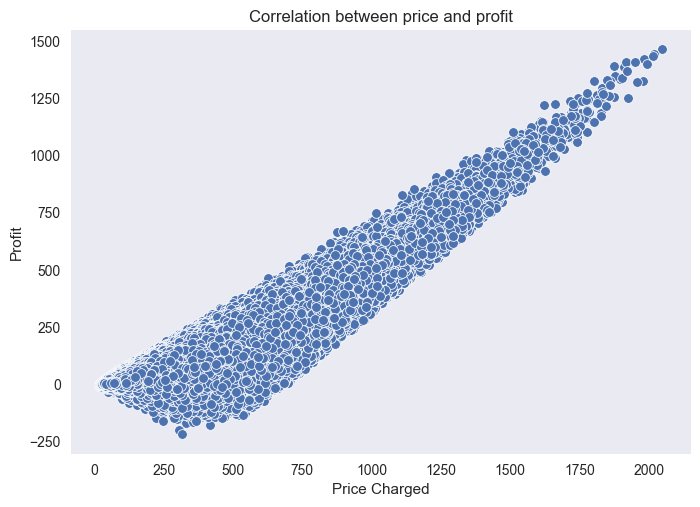

In [184]:
plt.style.use('seaborn')
sns.scatterplot(data=master_df, x='Price Charged', y='Profit')
plt.title('Correlation between price and profit')
plt.grid(False)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2247947494.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


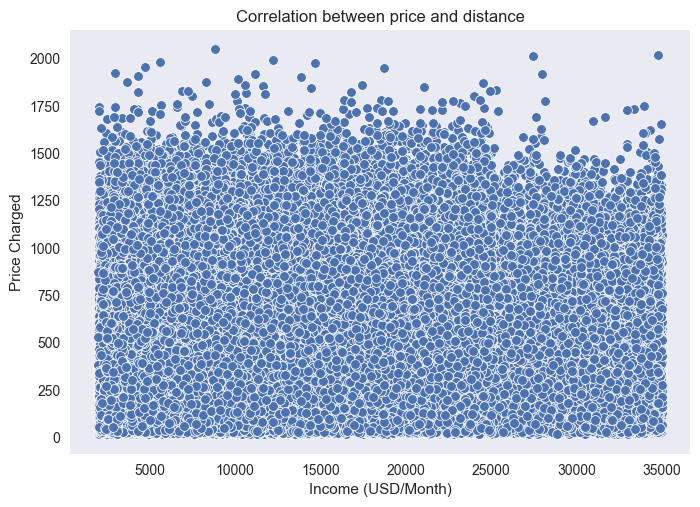

In [173]:
plt.style.use('seaborn')
sns.scatterplot(data=master_df.merge(cus_df, how='inner', on=['Customer ID']), x='Income (USD/Month)', y='Price Charged')
plt.title('Correlation between price and distance')
plt.grid(False)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2593332609.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


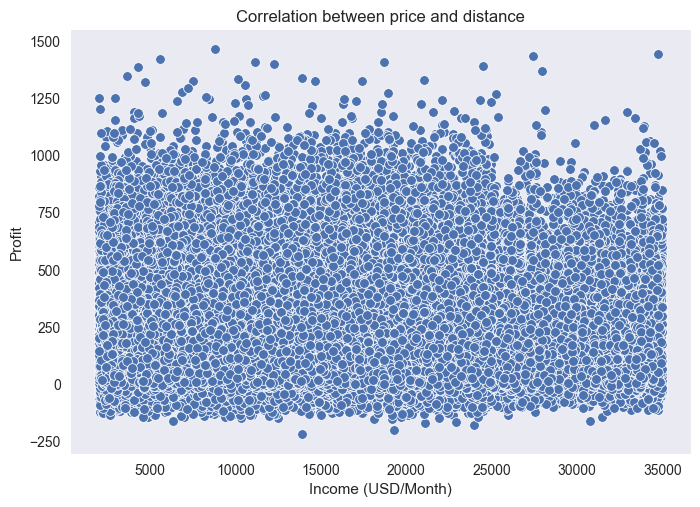

In [174]:
plt.style.use('seaborn')
sns.scatterplot(data=master_df.merge(cus_df, how='inner', on=['Customer ID']), x='Income (USD/Month)', y='Profit')
plt.title('Correlation between price and distance')
plt.grid(False)
plt.show()

In [165]:
full_df = master_df.merge(cus_df, how='inner', on=['Customer ID'])

In [185]:
full_df.groupby(['Company'])['KM Travelled'].sum()

Company
Pink Cab      1911073.11
Yellow Cab    6199417.47
Name: KM Travelled, dtype: float64

In [187]:
full_df.groupby(['Company'])['KM Travelled'].mean()

Company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: KM Travelled, dtype: float64

In [226]:
full_df.groupby(['Company', 'Gender'])['KM Travelled'].sum()

Company     Gender
Pink Cab    Female     846431.28
            Male      1064641.83
Yellow Cab  Female    2620127.59
            Male      3579289.88
Name: KM Travelled, dtype: float64

In [227]:
full_df.groupby(['Company', 'Gender'])['Transaction ID'].count()

Company     Gender
Pink Cab    Female     37480
            Male       47231
Yellow Cab  Female    116000
            Male      158681
Name: Transaction ID, dtype: int64

In [177]:
full_df.groupby(['Company', 'Gender'])['Profit'].sum()

Company     Gender
Pink Cab    Female    2.330533e+06
            Male      2.976796e+06
Yellow Cab  Female    1.813142e+07
            Male      2.588896e+07
Name: Profit, dtype: float64

### Conclusion
1. Price is highly correlated with distance
2. Average KM distance and total distance of Yellow cab is higher than that of Pink -> One of reason behind the high profit of Yellow Cab.


In [186]:
full_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Day of Week,Month-Year,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,1,2016-08-01,57.3150,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,6,2018-07-01,281.2772,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,5,2018-11-01,194.6480,29290,Card,Male,28,10813
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,3,2016-06-01,23.6660,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,6,2018-04-01,253.9808,27703,Card,Male,27,9237


In [210]:
full_df_with_city = full_df.merge(city_df, how='inner', on='City')

In [211]:
full_df_with_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Month               359392 non-null  int64         
 8   Year                359392 non-null  int64         
 9   Day of Week         359392 non-null  int64         
 10  Month-Year          359392 non-null  datetime64[ns]
 11  Profit              359392 non-null  float64       
 12  Customer ID         359392 non-null  int64         
 13  Payment_Mode        359392 no

In [213]:
city_df.sort_values('Population', ascending=False).head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\63922683.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


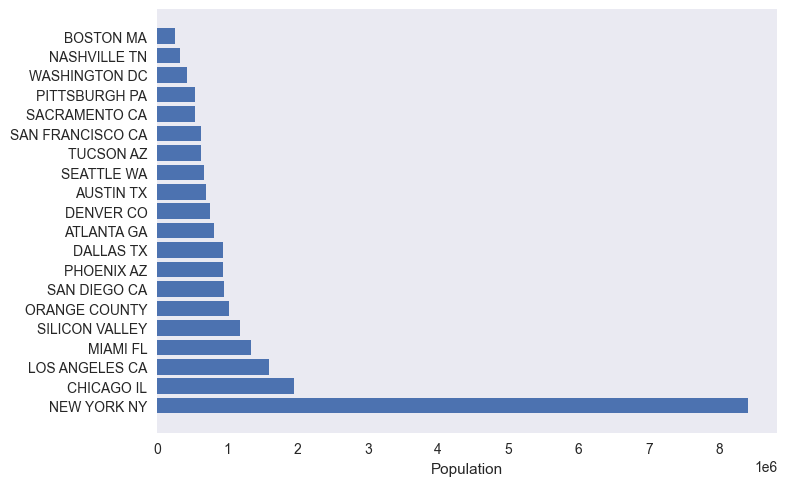

In [221]:
plt.style.use('seaborn')
plt.barh(city_df['City'], city_df['Population'])
plt.xlabel('Population')
plt.grid(False)
plt.show()

In [269]:
pink_pop = full_df_with_city.loc[full_df_with_city['Company'] == 'Pink Cab'].groupby(['Company', 'City'])['Customer ID'].nunique().reset_index().sort_values('Customer ID', ascending=False)
yellow_pop = full_df_with_city.loc[full_df_with_city['Company'] == 'Yellow Cab'].groupby(['Company', 'City'])['Customer ID'].nunique().reset_index().sort_values('Customer ID', ascending=False)

In [257]:
city_with_income = full_df_with_city.groupby(['City'])['Income (USD/Month)'].median().reset_index().sort_values('Income (USD/Month)', ascending=False)


In [259]:
city_with_income

,City,Income (USD/Month)
16,SILICON VALLEY,15107.0
9,NEW YORK NY,15024.0
10,ORANGE COUNTY,14963.0
6,LOS ANGELES CA,14889.0
13,SACRAMENTO CA,14829.0
7,MIAMI FL,14759.0
2,BOSTON MA,14743.0
0,ATLANTA GA,14655.0
11,PHOENIX AZ,14646.0
14,SAN DIEGO CA,14612.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\348075654.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


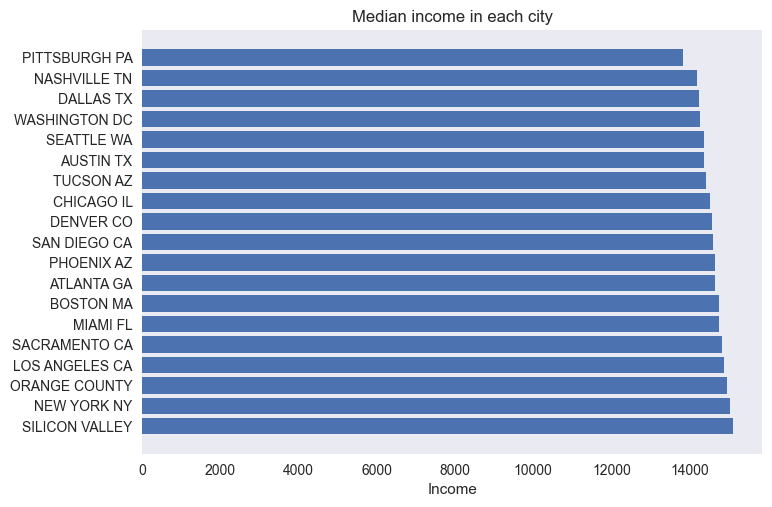

In [260]:
plt.style.use('seaborn')
plt.barh(city_with_income['City'], city_with_income['Income (USD/Month)'])
plt.xlabel('Income')
plt.title('Median income in each city')
plt.grid(False)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2137682710.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


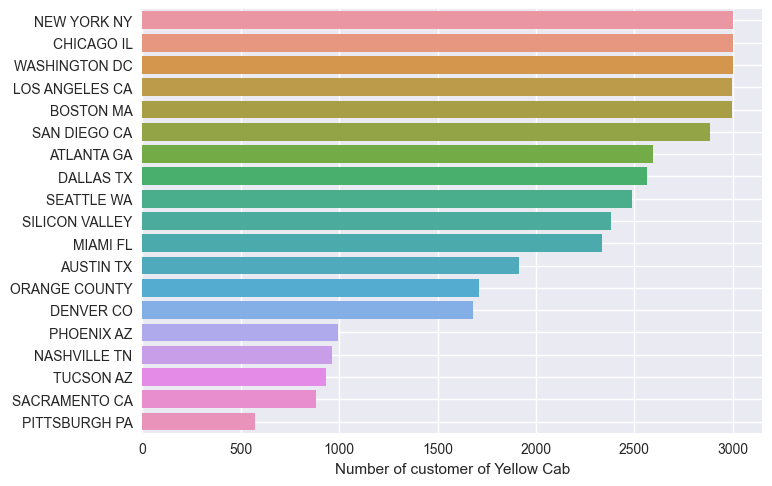

In [266]:
plt.style.use('seaborn')
sns.barplot(data= yellow_pop, x='Customer ID', y='City', orient='h')
plt.ylabel(None)
plt.xlabel('Number of customer of Yellow Cab')
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2065702982.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


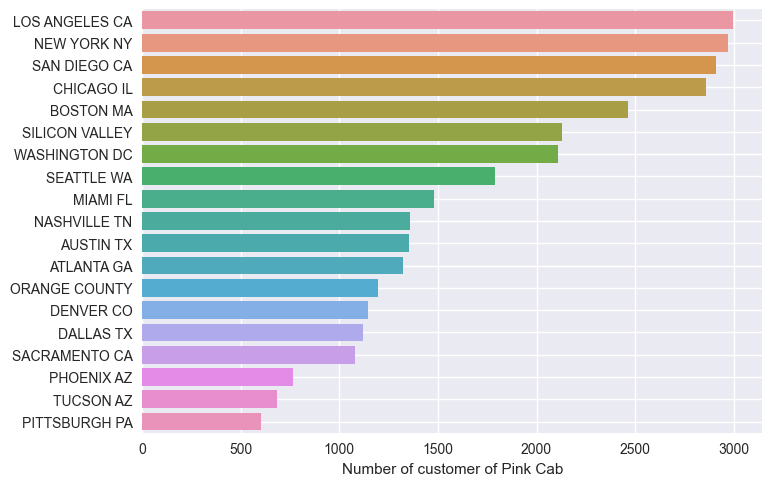

In [265]:
plt.style.use('seaborn')
sns.barplot(data= pink_pop, x='Customer ID', y='City', orient='h')
plt.ylabel(None)
plt.xlabel('Number of customer of Pink Cab')
plt.grid(True)
plt.show()

### Conclusion
1. New York, Los Angeles, Chicago are cities have highest population. Yellow Cab acquire higher pct of customer compare to Pink -> It is beneficial for Yellow Cab for expanding its business later
2. people in New York, Los Angeles have a high income and standard of living. Combine this factor with previous advantage, Yellow Cab can increase its revenue in the future. Therefore, Yellow Cab generally have a higher potential to develop than Pink Cab